# Stock Volume EDA

In [22]:
# Set up the configuration for accessing the storage account
storage_account_name = "team12storage"
storage_account_key = "ZdpCqxRwuQbJ8fUYN7EMbTLjOyj+I9rI6IjcQ/uU+4aFG46TQqjiz1Piq9SWKGkkjszo3r94l26M+AStR5PvPg=="

spark.conf.set(
    "fs.azure.account.key." + storage_account_name + ".dfs.core.windows.net",
    storage_account_key
)
container = "team12blobcontainer"
abfss_base_path = f"abfss://{container}@{storage_account_name}.dfs.core.windows.net/"
df = spark.read.csv(f"{abfss_base_path}Medallion/Bronze/Stock_Volume/batch/part-00000-2af012aa-4cd4-49c4-8cc9-22118f2603e5-c000.csv", inferSchema=True)
df = df.toPandas()


StatementMeta(StockPool, 2, 23, Finished, Available, Finished)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.dates import DateFormatter, date2num

StatementMeta(StockPool, 2, 24, Finished, Available, Finished)

In [24]:
# Set plotting style
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

StatementMeta(StockPool, 2, 25, Finished, Available, Finished)

In [25]:
# 1. Basic Data Information
print("\n--- Basic Data Information ---")
print(f"Data shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

StatementMeta(StockPool, 2, 26, Finished, Available, Finished)


--- Basic Data Information ---
Data shape: (320, 6)

Data types:
_c0    datetime64[ns]
_c1           float64
_c2           float64
_c3           float64
_c4           float64
_c5             int32
dtype: object


In [26]:
# Rename columns
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

StatementMeta(StockPool, 2, 27, Finished, Available, Finished)

In [27]:
print("\nSummary statistics:")
print(df.describe())

StatementMeta(StockPool, 2, 28, Finished, Available, Finished)


Summary statistics:
            Close        High         Low        Open        Volume
count  320.000000  320.000000  320.000000  320.000000  3.200000e+02
mean   111.256392  113.498048  108.857206  111.356894  3.606989e+08
std     25.547923   26.030856   25.198978   25.796488  1.580427e+08
min     47.551144   48.165911   47.302237   47.467176  1.051570e+08
25%     90.362566   91.584153   88.476433   90.234097  2.367781e+08
50%    117.630512  120.035550  115.366437  117.784594  3.228920e+08
75%    131.772789  134.980611  129.508084  132.058544  4.474703e+08
max    149.416245  153.115916  147.806407  153.015919  1.142269e+09


In [28]:
# Basic data preprocessing
# Convert Date column to datetime if it's not already
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    # Set Date as index for time series analysis
    df_ts = df.set_index('Date')
else:
    # If 'Date' column doesn't exist, try to find a date column
    date_cols = [col for col in df.columns if df[col].dtype == 'datetime64[ns]' or 'date' in col.lower()]
    if date_cols:
        date_col = date_cols[0]
        print(f"Using {date_col} as the date column")
        df['Date'] = pd.to_datetime(df[date_col])
        df_ts = df.set_index('Date')
    else:
        print("No date column found. Please rename your date column to 'Date'")
        # Create a dummy index for now
        df['Date'] = pd.date_range(start='2025-01-01', periods=len(df))
        df_ts = df.set_index('Date')

StatementMeta(StockPool, 2, 29, Finished, Available, Finished)

In [29]:
# 2. Check for missing values
print("\n--- Missing Value Analysis ---")
missing_values = df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

StatementMeta(StockPool, 2, 30, Finished, Available, Finished)


--- Missing Value Analysis ---
Missing values per column:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


StatementMeta(StockPool, 2, 31, Finished, Available, Finished)

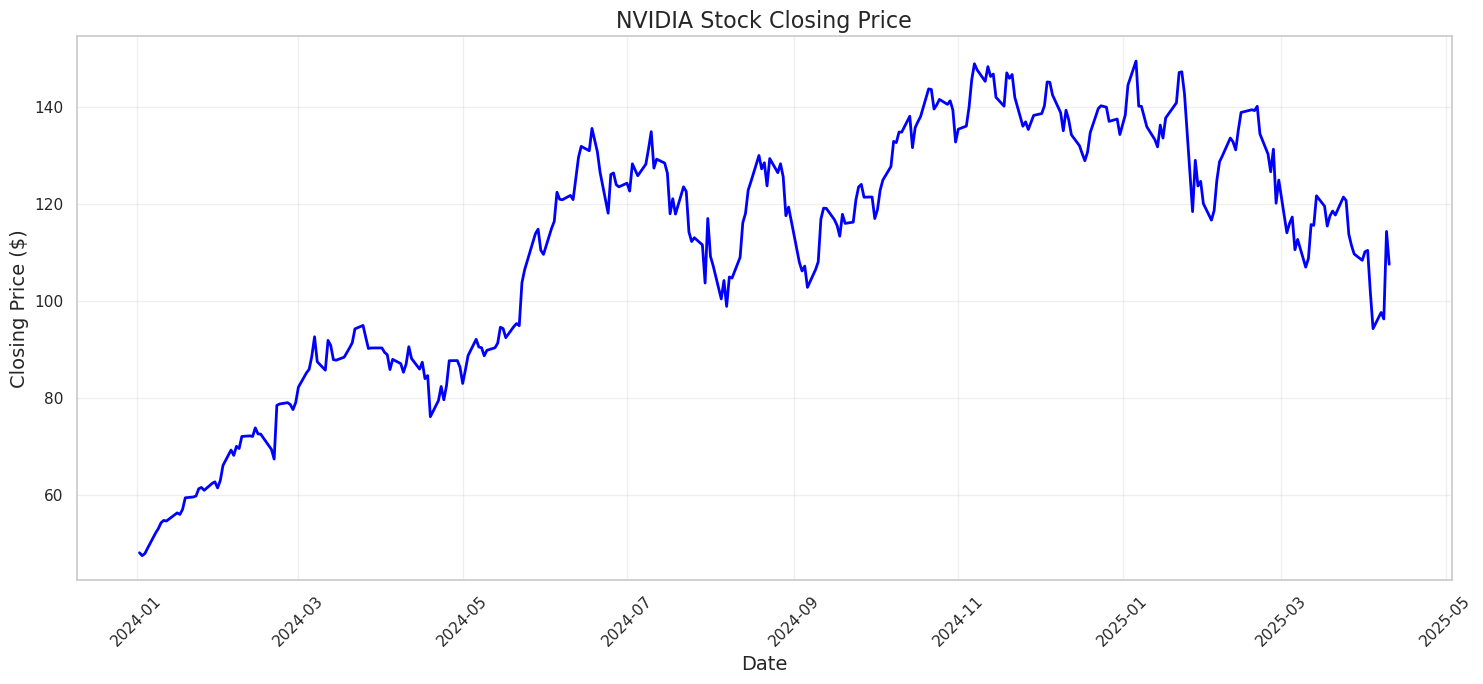

In [30]:
# 3. Time Series Analysis
# Set Date as index for time series analysis
df_ts = df.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(15, 7))
plt.title('NVIDIA Stock Closing Price', fontsize=16)
plt.plot(df_ts['Close'], color='blue', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price ($)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


StatementMeta(StockPool, 2, 32, Finished, Available, Finished)

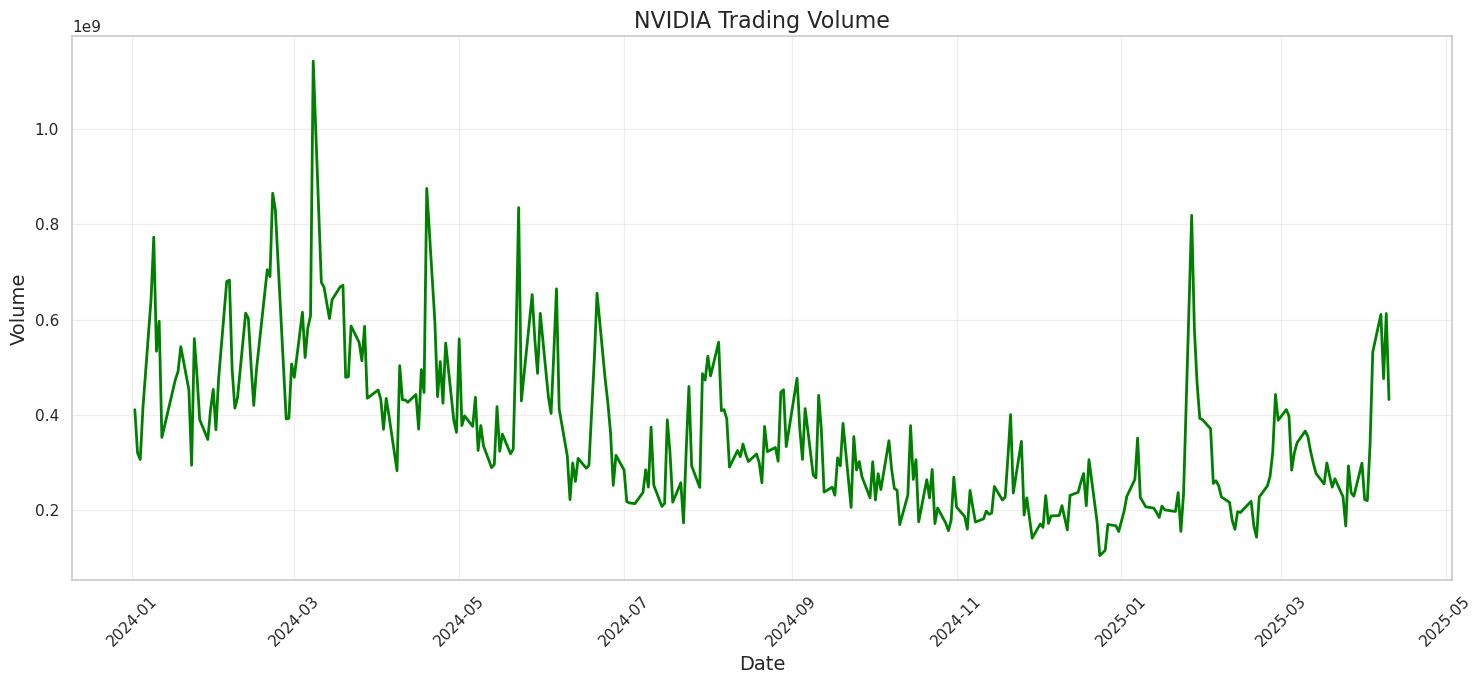

In [31]:
# 4. Trading Volume Analysis
plt.figure(figsize=(15, 7))
plt.title('NVIDIA Trading Volume', fontsize=16)
plt.plot(df_ts['Volume'], color='green', linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

StatementMeta(StockPool, 2, 33, Finished, Available, Finished)

<Figure size 1500x700 with 0 Axes>

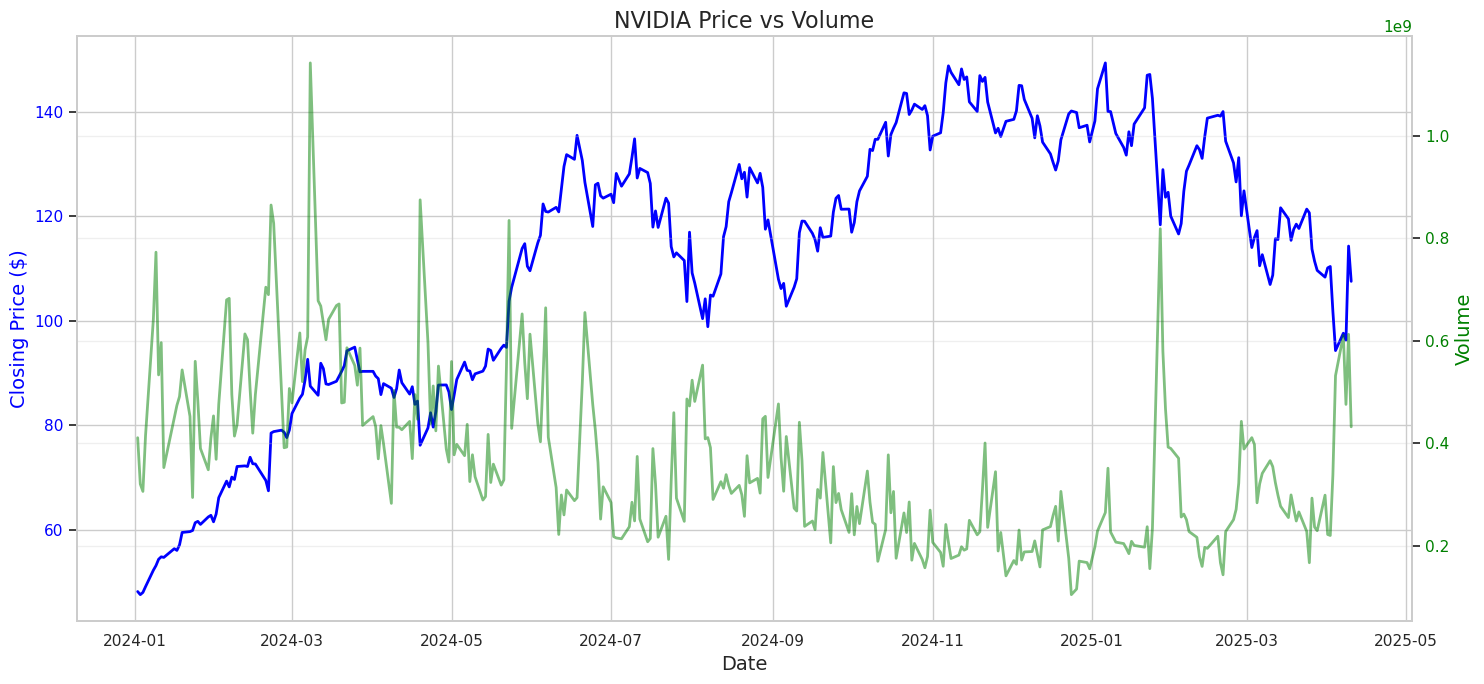

In [32]:
# 9. Price vs Volume Relationship
plt.figure(figsize=(15, 7))
fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Closing Price ($)', fontsize=14, color='blue')
ax1.plot(df['Date'], df['Close'], color='blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', fontsize=14, color='green')
ax2.plot(df['Date'], df['Volume'], color='green', alpha=0.5, linewidth=2)
ax2.tick_params(axis='y', labelcolor='green')

plt.title('NVIDIA Price vs Volume', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

StatementMeta(StockPool, 2, 35, Finished, Available, Finished)

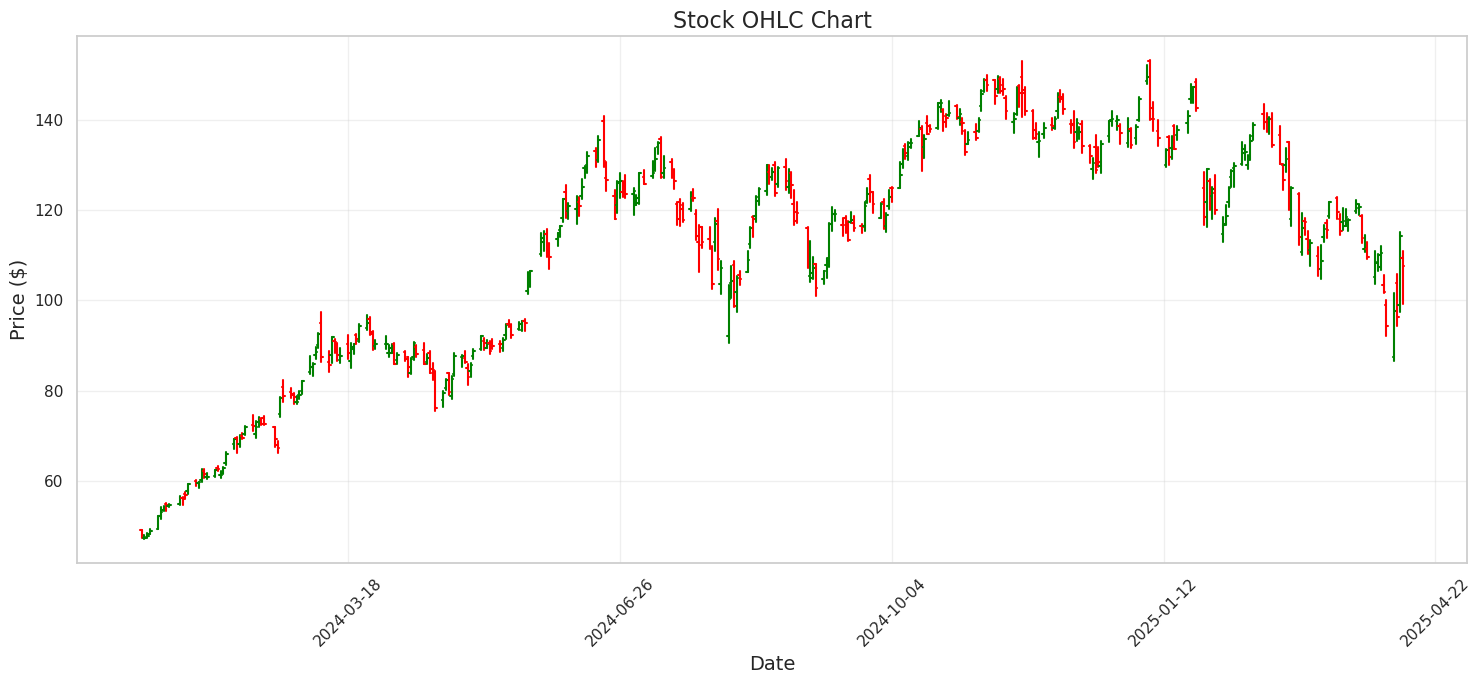

In [34]:
# 8. Alternative to Candlestick Chart - OHLC plot using matplotlib
if all(col in df.columns for col in ['Open', 'High', 'Low', 'Close']):
    # Create a custom OHLC plot
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Format the x-axis as dates
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    
    # Calculate width for the OHLC bars
    date_range = (df['Date'].max() - df['Date'].min()).days
    width = max(0.5, date_range / len(df) * 0.8)  # Adaptive width based on data density
    
    # Plot the OHLC data
    for i, row in df.iterrows():
        # Color based on whether close is higher than open
        color = 'green' if row['Close'] >= row['Open'] else 'red'
        
        # Convert date to number for plotting
        date_num = date2num(row['Date'])
        
        # Plot vertical line from high to low
        ax.plot([date_num, date_num], [row['Low'], row['High']], color=color, linewidth=1.5)
        
        # Plot horizontal line for open price
        ax.plot([date_num - width/2, date_num], [row['Open'], row['Open']], color=color, linewidth=1.5)
        
        # Plot horizontal line for close price
        ax.plot([date_num, date_num + width/2], [row['Close'], row['Close']], color=color, linewidth=1.5)
    
    plt.title('Stock OHLC Chart', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price ($)', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

StatementMeta(StockPool, 2, 37, Finished, Available, Finished)

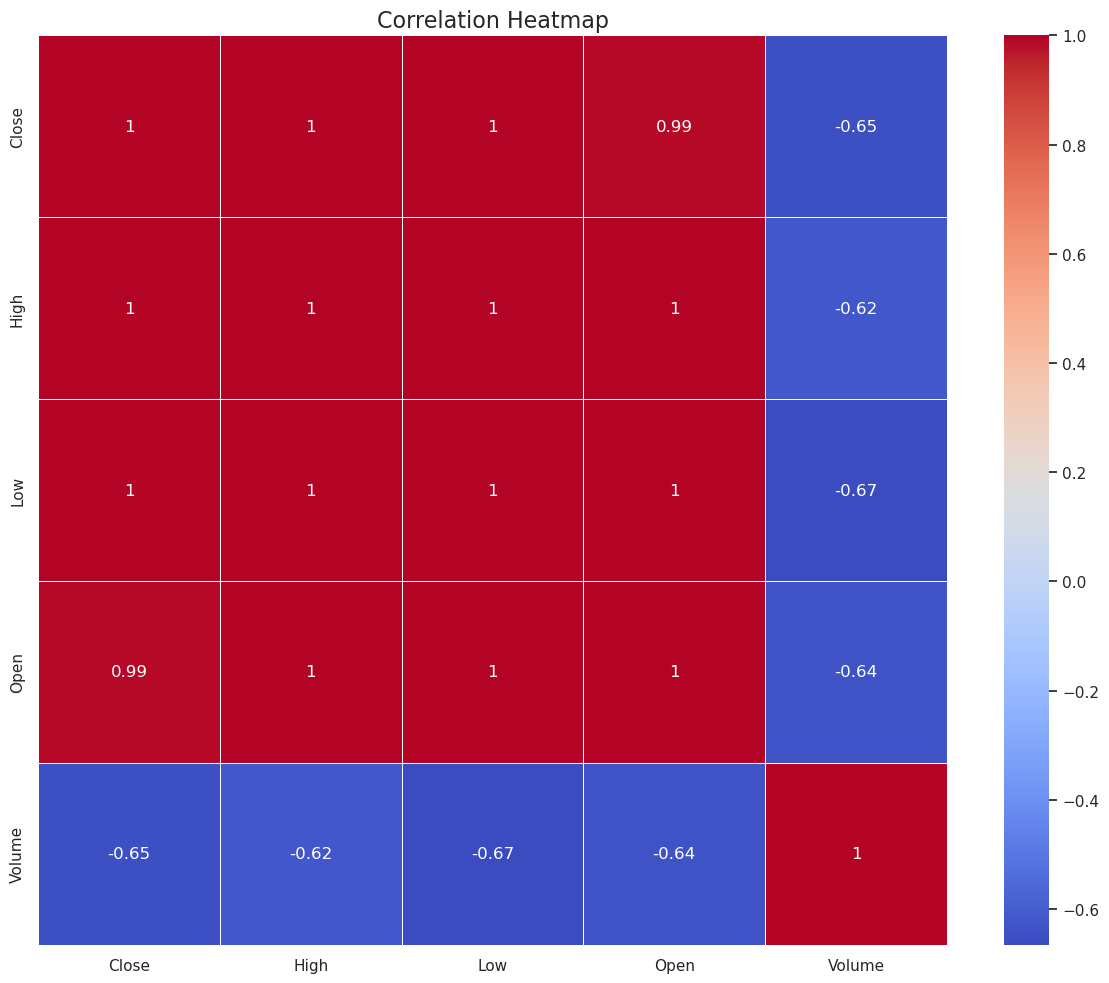

In [36]:
# 10. Correlation Analysis
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(12, 10))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16)
    plt.tight_layout()
    plt.show()
    

In [39]:
# 16. Summary Statistics Report
print("\n--- Summary of Stock Performance ---")
if 'Date' in df.columns:
    print(f"Period: {df['Date'].min()} to {df['Date'].max()}")

if 'Close' in df.columns:
    print(f"Starting Price: ${df['Close'].iloc[0]:.2f}")
    print(f"Ending Price: ${df['Close'].iloc[-1]:.2f}")
    price_change = ((df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]) * 100
    print(f"Overall Price Change: {price_change:.2f}%")

if 'Daily_Return' in df.columns:
    print(f"Average Daily Return: {df['Daily_Return'].mean():.2f}%")
    print(f"Volatility (Std of Daily Returns): {df['Daily_Return'].std():.2f}%")
    print(f"Maximum Daily Gain: {df['Daily_Return'].max():.2f}%")
    print(f"Maximum Daily Loss: {df['Daily_Return'].min():.2f}%")

if 'Volume' in df.columns:
    print(f"Average Trading Volume: {df['Volume'].mean():.0f}")
    print(f"Maximum Volume: {df['Volume'].max():.0f}")

StatementMeta(StockPool, 2, 40, Finished, Available, Finished)


--- Summary of Stock Performance ---
Period: 2024-01-02 00:00:00 to 2025-04-10 00:00:00
Starting Price: $48.15
Ending Price: $107.57
Overall Price Change: 123.41%
Average Trading Volume: 360698947
Maximum Volume: 1142269000
